In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import math 

Dane z https://www.kaggle.com/datasets/amirhosseinmirzaie/americancitizenincome/data

In [61]:
df = pd.read_csv("/Users/aniamarjankowska/Documents/GitHub/annual_income_analysis/income.csv")

In [62]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   fnlwgt          25000 non-null  int64 
 3   education       25000 non-null  object
 4   education.num   25000 non-null  int64 
 5   marital.status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital.gain    25000 non-null  int64 
 11  capital.loss    25000 non-null  int64 
 12  hours.per.week  25000 non-null  int64 
 13  native.country  25000 non-null  object
 14  income          25000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


In [64]:
df.shape

(25000, 15)

In [65]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,25000.00000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000
mean,38.60916,1.896611e+05,10.076320,1083.144040,87.489800,40.442800
std,13.68660,1.054713e+05,2.576967,7321.971568,402.830246,12.309706
min,17.00000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.00000,1.179830e+05,9.000000,0.000000,0.000000,40.000000
50%,37.00000,1.782110e+05,10.000000,0.000000,0.000000,40.000000
75%,48.00000,2.370682e+05,12.000000,0.000000,0.000000,45.000000
max,90.00000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [66]:
df.replace("?", np.nan, inplace=True)
df.isna().sum()

age                  0
workclass         1429
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1434
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     437
income               0
dtype: int64

In [67]:
df.dropna(inplace=True)

In [68]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [69]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
5,63,Private,111963,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,16,United-States,<=50K


- **age**: Wiek osoby.
- **workclass**: Ogólny termin wskazujący status zatrudnienia osoby.
- **fnlwgt**: Waga końcowa, reprezentująca liczbę osób, którą ta dana reprezentuje (próbka reprezentatywna).
- **education**: Najwyższy poziom wykształcenia osiągnięty przez osobę.
- **education.num**: Najwyższy poziom wykształcenia osiągnięty przez osobę w formie numerycznej.
- **marital.status**: Status cywilny osoby. Zwróć uwagę, że "Married-civ-spouse" oznacza cywilnego małżonka, a "Married-AF-spouse" odnosi się do małżonka w Siłach Zbrojnych.
- **occupation**: Ogólny typ zawodu osoby.
- **relationship**: Relacja tej osoby z innymi, na przykład małżonek (mąż). Każdy punkt danych ma tylko jedną relację.
- **race**: Rasa.
- **sex**: Płeć biologiczna osoby.
- **capital.gain**: Zyski kapitałowe osoby.
- **capital.loss**: Straty kapitałowe osoby.
- **hours.per.week**: Liczba godzin, które osoba zadeklarowała jako przepracowane w tygodniu.
- **native.country**: Kraj pochodzenia.
- **income**: Dochód, mniejszy lub równy $50,000 (`<=50K`) lub większy (`>50K`).


In [70]:
def categorical_value_counts(data):
    categorical_cols = data.select_dtypes(include=['object']).columns 
    value_counts = {col: data[col].value_counts() for col in categorical_cols}
    return value_counts 

In [71]:
# Załóżmy, że masz DataFrame o nazwie data
value_counts = categorical_value_counts(df)

# Wyświetlenie wyników
for col, counts in value_counts.items():
    print(f"\nColumn: {col}")
    print(counts)



Column: workclass
workclass
Private             17157
Self-emp-not-inc     1908
Local-gov            1535
State-gov             992
Self-emp-inc          820
Federal-gov           725
Without-pay            12
Name: count, dtype: int64

Column: education
education
HS-grad         7520
Some-college    5144
Bachelors       3873
Masters         1231
Assoc-voc       1008
11th             805
Assoc-acdm       760
10th             647
Prof-school      420
7th-8th          410
9th              351
Doctorate        301
12th             298
5th-6th          228
1st-4th          121
Preschool         32
Name: count, dtype: int64

Column: marital.status
marital.status
Married-civ-spouse       10830
Never-married             7451
Divorced                  3214
Separated                  718
Widowed                    642
Married-spouse-absent      277
Married-AF-spouse           17
Name: count, dtype: int64

Column: occupation
occupation
Prof-specialty       3119
Craft-repair         3083
Exec-ma

In [72]:
# Funkcja do obliczania V-Cramera
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

def cramers_v_output(v_cramer, variable1, variable2):
    print(f"V-Cramer dla zmiennych {variable1} & {variable2}: {v_cramer}")

    # Interpretacja wyniku
    if v_cramer < 0.1:
        print("Bardzo słaba zależność")
    elif v_cramer < 0.3:
        print("Słaba zależność")
    elif v_cramer < 0.5:
        print("Umiarkowana zależność")
    else:
        print("Silna zależność")

In [73]:
# Utworzenie macierzy contingency
contingency_table = pd.crosstab(df['relationship'], df['marital.status'])
# Obliczenie V-Cramera
v_cramer = cramers_v(contingency_table)
cramers_v_output(v_cramer, 'relationship', 'marital.status')

V-Cramer dla zmiennych relationship & marital.status: 0.4883047419738085
Umiarkowana zależność


In [74]:
contingency_table = pd.crosstab(df['workclass'], df['occupation'])
# Obliczenie V-Cramera
v_cramer = cramers_v(contingency_table)
cramers_v_output(v_cramer, 'workclass', 'occupation')


V-Cramer dla zmiennych workclass & occupation: 0.21386591543583022
Słaba zależność


In [75]:
# Utworzenie macierzy contingency
contingency_table = pd.crosstab(df['race'], df['native.country'])

# Obliczenie V-Cramera
v_cramer = cramers_v(contingency_table)
cramers_v_output(v_cramer, 'race', 'native.country')


V-Cramer dla zmiennych race & native.country: 0.42552233243500237
Umiarkowana zależność


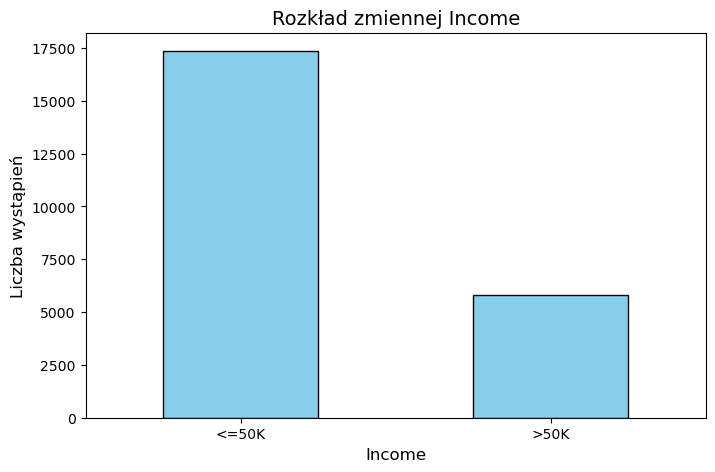

In [76]:
plt.figure(figsize=(8, 5))
df['income'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Rozkład zmiennej Income', fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Liczba wystąpień', fontsize=12)
plt.xticks(rotation=0)  # Ustawienie etykiet osi X poziomo

# Wyświetlenie wykresu
plt.show()


In [77]:
print(f"Klasa pozytywna to: {df['income'].value_counts()[1] / (df['income'].value_counts()[0] + df['income'].value_counts()[1]) * 100}% zbioru danych.")

Klasa pozytywna to: 25.01187956283209% zbioru danych.


In [78]:
# Utworzenie nowej zmiennej jako różnicy między capital.gain i capital.loss
df['net.capital'] = df['capital.gain'] - df['capital.loss']

# Sprawdzenie statystyk nowej zmiennej
print(df['net.capital'].describe())

# Podgląd wartości
print(df[['capital.gain', 'capital.loss', 'net.capital']].head())

count    23149.000000
mean      1005.553458
std       7347.306965
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: net.capital, dtype: float64
   capital.gain  capital.loss  net.capital
0         99999             0        99999
1             0             0            0
2             0             0            0
3             0             0            0
5             0             0            0


In [79]:
print((df['net.capital'] == 0).sum())

20074


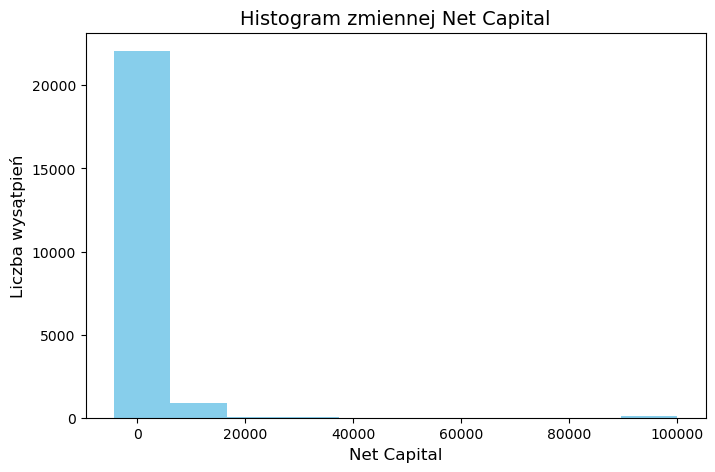

In [80]:
plt.figure(figsize=(8, 5))
plt.hist(df['net.capital'], color='skyblue')

plt.title("Histogram zmiennej Net Capital", fontsize=14)
plt.xlabel("Net Capital", fontsize=12)
plt.ylabel("Liczba wysątpień", fontsize=12)

plt.show()

In [81]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,net.capital
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K,99999
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K,0
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K,0
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K,0
5,63,Private,111963,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,16,United-States,<=50K,0


In [82]:
df = df.drop(columns=['education', 'relationship', 'capital.loss', 'capital.gain'])

In [83]:
region_mapping = {
    'Cambodia': 'Asia',
    'Canada': 'North America',
    'China': 'Asia',
    'Columbia': 'South America',
    'Cuba': 'Caribbean',
    'Dominican-Republic': 'Caribbean',
    'Ecuador': 'South America',
    'El-Salvador': 'Central America',
    'England': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Guatemala': 'Central America',
    'Haiti': 'Caribbean',
    'Honduras': 'Central America',
    'Hong': 'Asia',
    'Hungary': 'Europe',
    'India': 'Asia',
    'Iran': 'Middle East',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Jamaica': 'Caribbean',
    'Japan': 'Asia',
    'Laos': 'Asia',
    'Mexico': 'North America',
    'Nicaragua': 'Central America',
    'Outlying-US(Guam-USVI-etc)': 'US Territories',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Puerto-Rico': 'Caribbean',
    'Scotland': 'Europe',
    'South': 'Asia',
    'Taiwan': 'Asia',
    'Thailand': 'Asia',
    'Trinadad&Tobago': 'Caribbean',
    'United-States': 'North America',
    'Vietnam': 'Asia',
    'Yugoslavia': 'Europe'
}

# Dodanie kolumny native.region na podstawie mapowania
df['native.region'] = df['native.country'].replace(region_mapping)

df = df.drop(columns=['native.country'])
# Sprawdzenie wyników
df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,race,sex,hours.per.week,income,net.capital,native.region
0,40,Self-emp-not-inc,223881,15,Married-civ-spouse,Prof-specialty,White,Male,70,>50K,99999,North America
1,30,Private,149118,9,Divorced,Craft-repair,White,Female,40,<=50K,0,North America
2,46,Private,109209,10,Married-civ-spouse,Adm-clerical,White,Male,40,>50K,0,North America
3,32,Private,229566,11,Married-civ-spouse,Other-service,White,Male,60,>50K,0,North America
5,63,Private,111963,10,Married-civ-spouse,Prof-specialty,White,Male,16,<=50K,0,North America


In [86]:
columns = ['workclass', 'marital.status', 'occupation', 'race','sex','native.region','income']    
df = pd.get_dummies(df, columns=columns, dtype=int, drop_first=True)

df.head()

,age,fnlwgt,education.num,hours.per.week,net.capital,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,race_White,sex_Male,native.region_Caribbean,native.region_Central America,native.region_Europe,native.region_Middle East,native.region_North America,native.region_South America,native.region_US Territories,income_>50K
0,40,223881,15,70,99999,0,0,0,1,0,...,1,1,0,0,0,0,1,0,0,1
1,30,149118,9,40,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,46,109209,10,40,0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,0,1
3,32,229566,11,60,0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,0,1
5,63,111963,10,16,0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,0,0
